- 분류 vs. 회귀: 분류는 이산적인 클래스 레이블을 예측하는 반면, 회귀는 연속적인 수치를 예측합니다.

- 결정 방식: 분류에서는 k개의 이웃 중 가장 많은 클래스에 속하는 레이블로 결정하고, 회귀에서는 k개의 이웃의 타겟 값의 평균을 사용하여 예측값을 결정합니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\fdsaf\AppData\Local\Temp\ipykernel_22424\3538350959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 농어 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_data = pd.DataFrame(
       {
              'length' : perch_length,
              'weight' : perch_weight,
       }
)
perch_data.to_csv('./perch_data.csv')
perch_df = perch_data.copy()

Text(0, 0.5, 'weight')

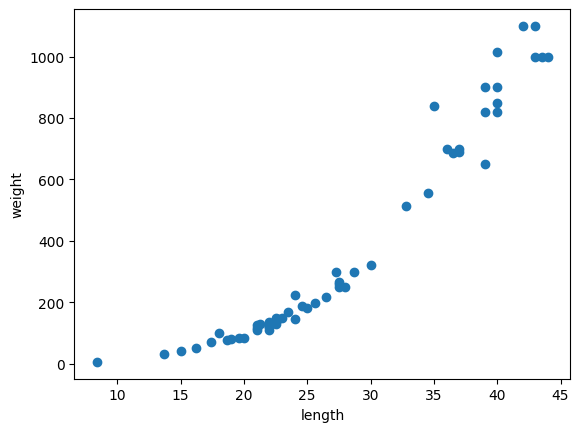

In [3]:
# 산점도 확인
plt.scatter(perch_df['length'], perch_df['weight'])
plt.xlabel('length')
plt.ylabel('weight')


In [4]:
from sklearn.model_selection import train_test_split

# input은 2차원 배열이나 데이터프레임으로, target은 1차원 배열이나 시리즈로 하는것이 일반적인 관례이다.
train_input, test_input, train_target, test_target = train_test_split(perch_df[['length']], perch_df['weight'], random_state=42)



## 결정 계수(R^2)

In [5]:
# K최근접이웃회귀 모델
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
# 테스트 세트 점수 확인
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target)) 

0.9698823289099254
0.992809406101064


- 분류의 경우 점수값이 정확하게 분류한 개수의 비율
- 회귀의 경우에는 결정계수 

0.993이면 아주 좋은값인거 같다. 하지만 직감적으로 얼마나 좋은지 이해하기는 어렵다.

타깃과 예측한 값 사이의 차이를 구해보자.
- sklearn.metrics 패키지는 mean_absolute_error 함수는 타깃과 예측의 절댓값 오차를 평균하여 반환한다.

In [33]:
from sklearn.metrics import mean_absolute_error


test_prediction = knr.predict(test_input)

# 타깃과 예측의 절댓값 오차를 평균하여 반환, 평균 절대 오차
mae = mean_absolute_error(test_target, test_prediction)
# mae = abs((test_prediction-test_target)).mean()
print(mae)


19.157142857142862


## 과대적합과 과소적합
보통은 훈련세트와 테스트세트를 평가하면 훈련세트의 점수가 더 높게 나온다. 모델이 훈련세트에 맞게 만들어졌기 때문이다.
- 훈련세트에 비해서 테스트세트 점수가 굉장히 낮으면 과대적합`overfitting` 이라고 한다 
  - 훈련세트에만 잘 맞는 모델, 실전에는 적합하지 않는 모델.
  - 훈련 세트에만 최적화 되어서 실제 데이터는 제대로 예측하지 못한다.
  -  데이터의 노이즈나 불필요한 세부 사항까지 학습하여, 이를 중요한 패턴으로 오인
- 훈련세트가 테스트세트보다 점수가 낮거나, 두 점수가 모두 낮은 경우엔 과소적합`underfitting` 이라고 한다.
  - 모델이 너무 단순하여 훈련세트에 적절히 훈련되지 않은 경우

In [35]:
print('과소적합' if knr.score(train_input, train_target) < knr.score(test_input, test_target) else '성공')

과소적합


과소 적합을 해결하려면 모델을 더 복잡하게 만드는 것이다. K-최근접 이웃 알고리즘 모델을 더 복잡하게 만드는 방법은 이웃의 개수를 줄이는 것이다.

**모델의 복잡성**
- 모델이 데이터에서 학습할 수 있는 정보의 양과 세부사항의 정도
- 얼마나 더 세밀한 패턴이나 미묘한 관계를 학습할수 있는가에 대한 지표
- 모델이 너무 복잡해지면 과적합의 위험이 있다.

In [56]:
knr3 = KNeighborsRegressor(n_neighbors=3)

knr3.fit(train_input, train_target)
knr3.score(train_input, train_target) 

0.9804899950518966

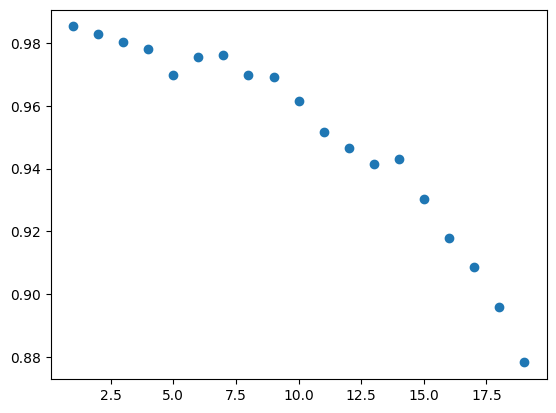

In [55]:
R_Square_lst = [KNeighborsRegressor(n_neighbors=i).fit(train_input, train_target).score(train_input, train_target) for i in range(1, 20)]

plt.scatter(range(1, 20), R_Square_lst)
# 일반적인 추세로는 n_neighbors가 증가함에 따라 점수가 떨어진다

In [57]:
# 테스트 세트 점수 확인
knr3.score(test_input, test_target)

0.9746459963987609

## 표준화 적용

In [67]:
from scipy import stats

perch_df['SL'] = stats.zscore(perch_df['length'])
perch_df['SW'] = stats.zscore(perch_df['weight'])
mean, dtd = perch_df.mean(), perch_df.std
display(perch_df)

,length,weight,SL,SW
0,8.4,5.9,-2.180225,-1.092422
1,13.7,32.0,-1.587434,-1.016660
2,15.0,40.0,-1.442032,-0.993438
3,16.2,51.5,-1.307815,-0.960056
4,17.4,70.0,-1.173599,-0.906355
5,18.0,100.0,-1.106490,-0.819272
6,18.7,78.0,-1.028197,-0.883133
7,19.0,80.0,-0.994643,-0.877327
8,19.6,85.0,-0.927534,-0.862814
9,20.0,85.0,-0.882795,-0.862814


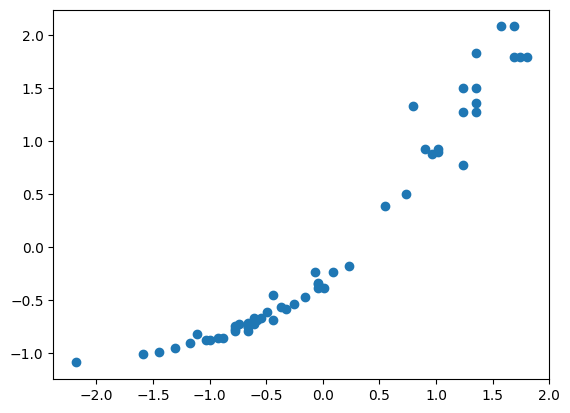

In [79]:
# plt.scatter(perch_df['length'], perch_df['weight'])
plt.scatter(perch_df['SL'], perch_df['SW'])

In [85]:
train_input, test_input, train_target, test_target = train_test_split(perch_df[['SL']], perch_df['SW'], random_state=42)
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
knr3.fit(train_input, train_target)
print(knr3.score(train_input, train_target))
print(knr3.score(test_input, test_target))


0.969912706348246
0.992809406101064
0.9804658767859535
0.9746459963987609
